<font face="Georgia" size=3>
    
Harsh Seksaria

2048011

2 - MDS

---

Machine Learning Lab - 4
    
        PCA v/s LDA
    
        27 February 2021

---
    
CHRIST (Deemed to be University)

---
</font>

In [1]:
#Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#ML libraries import
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [3]:
#Using the inbuilt breast cancer dataset from scikit learn
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
fl = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
fl.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# <font face="Georgia" size=5>Data Pre-processing</font>

1. Dataset shape

In [4]:
print("Number of rows in dataset:", fl.shape[0])
print("Number of columns in dataset:", fl.shape[1])

Number of rows in dataset: 569
Number of columns in dataset: 30


2. Null Values

In [5]:
fl.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

*There are no null values in the dataset.*

3. Data Distribution

array([[<AxesSubplot:title={'center':'mean radius'}>,
        <AxesSubplot:title={'center':'mean texture'}>,
        <AxesSubplot:title={'center':'mean perimeter'}>,
        <AxesSubplot:title={'center':'mean area'}>,
        <AxesSubplot:title={'center':'mean smoothness'}>],
       [<AxesSubplot:title={'center':'mean compactness'}>,
        <AxesSubplot:title={'center':'mean concavity'}>,
        <AxesSubplot:title={'center':'mean concave points'}>,
        <AxesSubplot:title={'center':'mean symmetry'}>,
        <AxesSubplot:title={'center':'mean fractal dimension'}>],
       [<AxesSubplot:title={'center':'radius error'}>,
        <AxesSubplot:title={'center':'texture error'}>,
        <AxesSubplot:title={'center':'perimeter error'}>,
        <AxesSubplot:title={'center':'area error'}>,
        <AxesSubplot:title={'center':'smoothness error'}>],
       [<AxesSubplot:title={'center':'compactness error'}>,
        <AxesSubplot:title={'center':'concavity error'}>,
        <AxesSubplot:ti

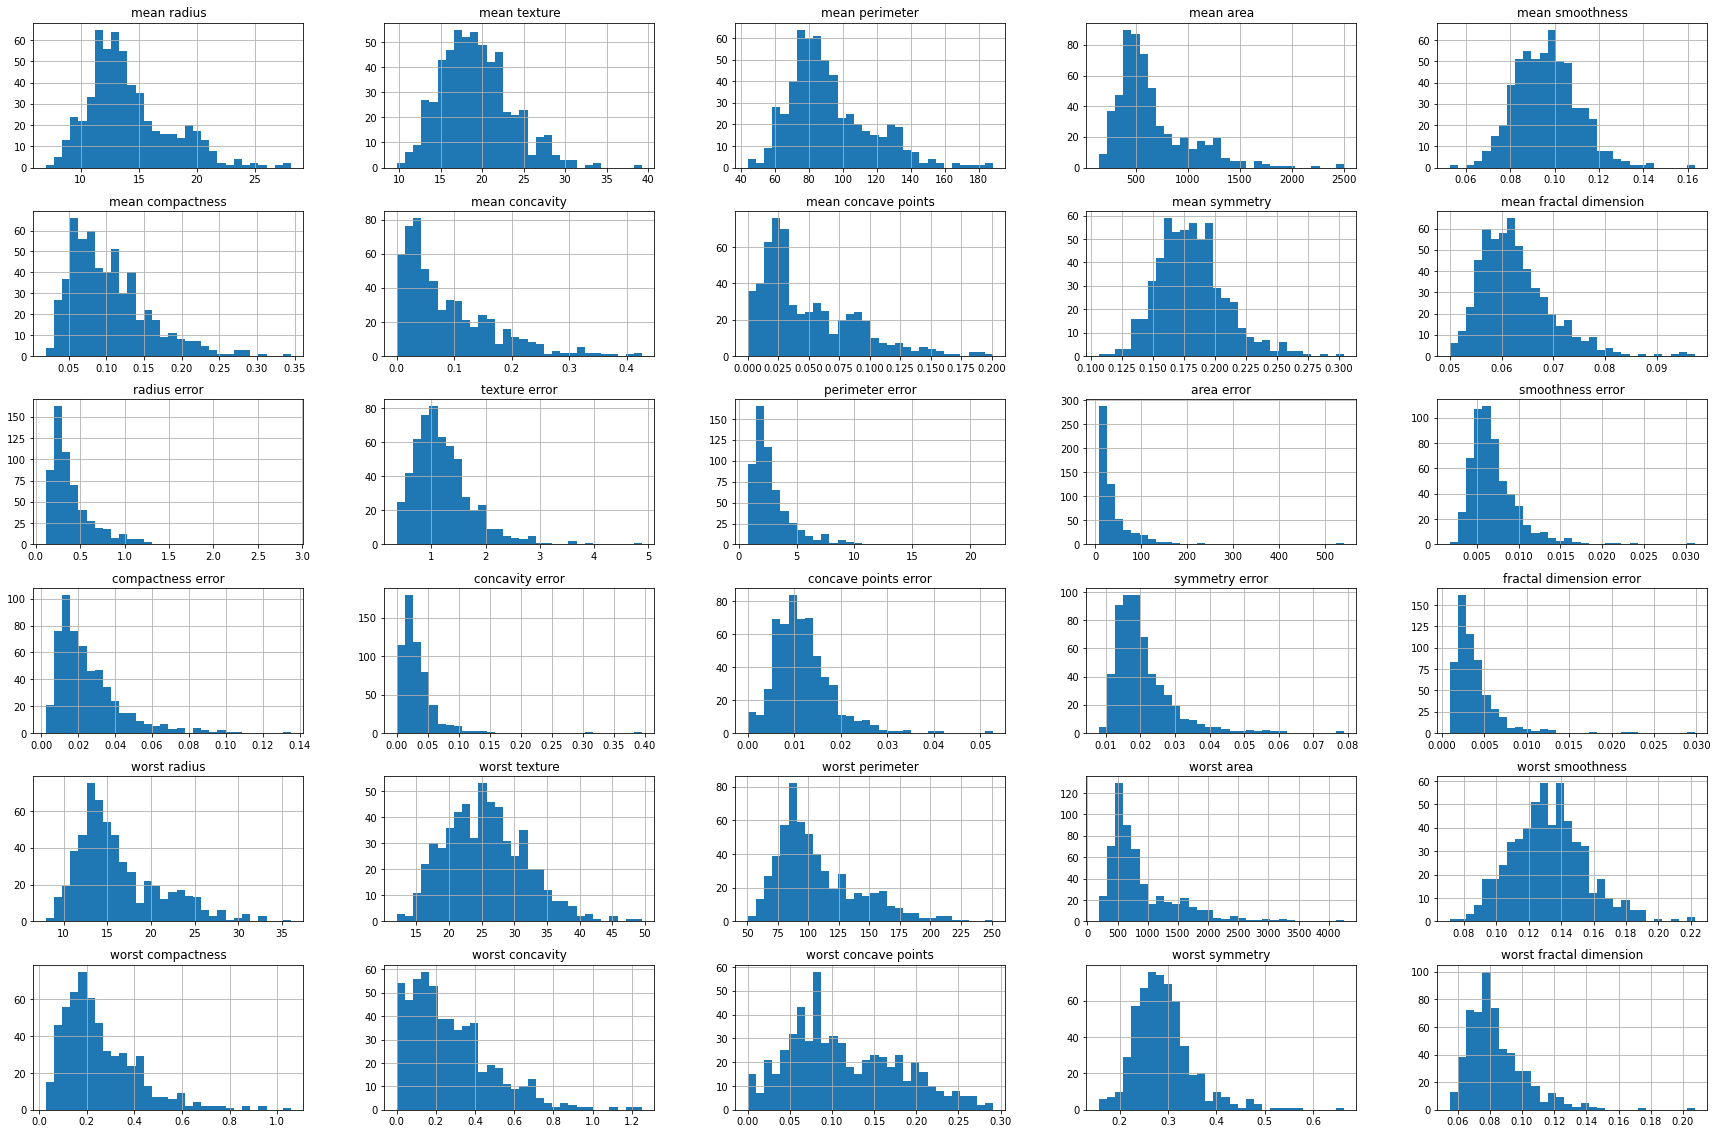

In [6]:
fl.hist(bins=30, figsize=(30, 20))

*The maximum number of columns in the dataset is not normally distributed. There is skewness in the data.*

# <font face="Georgia" size=5>PCA & LDA</font>

In [7]:
x = fl
y = pd.DataFrame(cancer['target'])
y.columns = ['CancerType']

In [8]:
x.shape, y.shape

((569, 30), (569, 1))

In [9]:
#Splitting into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=11, stratify=y)

In [10]:
#Removing constant features using variance threshold
constant_filter = VarianceThreshold(threshold=0.10)

#Applying the filter on the training set
constant_filter.fit(X_train)

#Remove constant features from training and test sets
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [11]:
#Number of duplicated features in the dataset, We remove one of the feature
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T =pd.DataFrame(X_test_T)
X_train_T.duplicated().sum()

0

In [12]:
duplicated_features = X_train_T.duplicated()
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [13]:
#standardize the data to get the same scale
scaler = StandardScaler().fit(X_train_unique)
X_train_unique = scaler.transform(X_train_unique)
X_test_unique = scaler.transform(X_test_unique)
X_train_unique = pd.DataFrame(X_train_unique)
X_test_unique = pd.DataFrame(X_test_unique)
X_train_unique.shape, X_test_unique.shape

((398, 11), (171, 11))

In [14]:
#Correlation matrix
corrmat = X_train_unique.corr()
corrmat.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.333688,0.997769,0.986198,-0.104559,0.685085,0.728089,0.969942,0.289167,0.965239,0.941609
1,0.333688,1.000000,0.339211,0.326528,0.370602,0.279599,0.246912,0.362535,0.911823,0.365127,0.345418
2,0.997769,0.339211,1.000000,0.985262,-0.094629,0.703385,0.735965,0.969725,0.295405,0.970500,0.942013
3,0.986198,0.326528,0.985262,1.000000,-0.074554,0.749316,0.804229,0.961981,0.273572,0.958070,0.960621
4,-0.104559,0.370602,-0.094629,-0.074554,1.000000,0.204193,0.078361,-0.119353,0.413891,-0.111507,-0.093683


In [15]:
#Finding the number of correlated features
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corr_features = get_correlation(X_train_unique, 0.40)
print('correlated features: ', len(set(corr_features)) )

correlated features:  8


In [16]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features, axis = 1)
X_train_uncorr.shape, X_test_uncorr.shape

((398, 3), (171, 3))

# <font face="Georgia" size=5>Dimensionality Reduction using LDA</font>

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#Transforming the data by using fit_transform()
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_uncorr, Y_train)
X_test_lda = lda.transform(X_test_uncorr)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [18]:
#Transformed data
X_train_lda.shape, X_test_lda.shape

((398, 1), (171, 1))

In [19]:
from sklearn.ensemble import RandomForestClassifier
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [20]:
%%time
run_randomForest(X_train_lda, X_test_lda, Y_train, Y_test)

<ipython-input-19-e37fb2efe457>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy on test set: 
0.8245614035087719
Wall time: 460 ms


In [21]:
%%time
run_randomForest(X_train, X_test, Y_train, Y_test)

<ipython-input-19-e37fb2efe457>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy on test set: 
0.9415204678362573
Wall time: 475 ms


# <font face="Georgia" size=5>Dimensionality Reduction using PCA</font>

In [22]:
from sklearn.decomposition import PCA
#Removing the features
pca = PCA(n_components=2, random_state=11)
pca.fit(X_train_uncorr)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=11, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=2, random_state=11)

In [23]:
#Training and testing dataset by PCA transformation
X_train_pca = pca.transform(X_train_uncorr)
X_test_pca = pca.transform(X_test_uncorr)
X_train_pca.shape, X_test_pca.shape

((398, 2), (171, 2))

In [24]:
%%time
run_randomForest(X_train_pca, X_test_pca, Y_train, Y_test)

<ipython-input-19-e37fb2efe457>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy on test set: 
0.847953216374269
Wall time: 600 ms


In [25]:
%%time
run_randomForest(X_train, X_test, Y_train, Y_test)

<ipython-input-19-e37fb2efe457>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy on test set: 
0.9415204678362573
Wall time: 475 ms


In [26]:
#Checking the accuracy for various selected components
for component in range(1,4):
    pca = PCA(n_components=component, random_state=11)
    pca.fit(X_train_uncorr)
    X_train_pca = pca.transform(X_train_uncorr)
    X_test_pca = pca.transform(X_test_uncorr)
    print('Selected Components: ', component)
    run_randomForest(X_train_pca, X_test_pca, Y_train, Y_test)
    print()

Selected Components:  1


<ipython-input-19-e37fb2efe457>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy on test set: 
0.6549707602339181

Selected Components:  2


<ipython-input-19-e37fb2efe457>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy on test set: 
0.847953216374269

Selected Components:  3


<ipython-input-19-e37fb2efe457>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy on test set: 
0.8771929824561403

